<b>이미지 라벨링</b><br>
파일명에 라벨 포함<br>
파일명에서 클래스 정보 추출 <br>
산과 바다 구분

In [88]:
import os
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers

In [89]:
import math
import numpy as np
from glob import glob
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [90]:
IMG_CHANNELS = 3
IMG_ROWS = 64
IMG_COLS = 64
CLASSES = 2  # 산, 바다

In [91]:
# 파일 경로에 대한 glob 패턴을 수정하세요.
mountain_files = glob('..\..\data\multi\m_산\*jpg')
sea_files = glob('..\..\data\multi\s_바다\*jpg')

# 이미지와 라벨을 불러오는 함수 정의
def load_images_and_labels(files, label):
    images = [image.load_img(p, target_size=(IMG_ROWS, IMG_COLS)) for p in files]
    labels = [label] * len(files)
    return images, labels

# 산과 바다 이미지 및 라벨 불러오기
mountain_images, mountain_labels = load_images_and_labels(mountain_files, 0)  # 산을 0으로 라벨링
sea_images, sea_labels = load_images_and_labels(sea_files, 1)  # 바다를 1로 라벨링

# 이미지와 라벨 병합
images = mountain_images + sea_images
y = mountain_labels + sea_labels

In [92]:
#define the convnet
def build(input_shape, classes):
    model = models.Sequential()
    model.add(layers.Convolution2D(32, (3, 3), activation='relu',
                        input_shape=input_shape))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(0.25))

    model.add(layers.Flatten())
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(classes, activation='softmax'))
    return model

In [93]:
# 이미지 벡터화
image_vector = np.asarray([image.img_to_array(img) for img in images])

In [94]:
image_vector[0]

array([[[254., 254., 254.],
        [  0.,   0.,   0.],
        [ 95.,  95.,  95.],
        ...,
        [133., 133., 133.],
        [  1.,   1.,   1.],
        [ 70.,  70.,  70.]],

       [[255., 255., 255.],
        [ 21.,  21.,  21.],
        [148., 148., 148.],
        ...,
        [ 42.,  42.,  42.],
        [ 26.,  26.,  26.],
        [ 18.,  18.,  18.]],

       [[179., 179., 179.],
        [108., 108., 108.],
        [251., 251., 251.],
        ...,
        [ 62.,  62.,  62.],
        [ 59.,  59.,  59.],
        [ 76.,  76.,  76.]],

       ...,

       [[ 17.,  17.,  17.],
        [149., 149., 149.],
        [ 14.,  14.,  14.],
        ...,
        [201., 201., 201.],
        [161., 161., 161.],
        [153., 153., 153.]],

       [[  9.,   9.,   9.],
        [ 69.,  69.,  69.],
        [ 14.,  14.,  14.],
        ...,
        [151., 151., 151.],
        [147., 147., 147.],
        [126., 126., 126.]],

       [[  1.,   1.,   1.],
        [ 32.,  32.,  32.],
        [  6.,  

In [95]:
image_vector.shape

(290, 64, 64, 3)

In [96]:
image_vector[0].shape

(64, 64, 3)

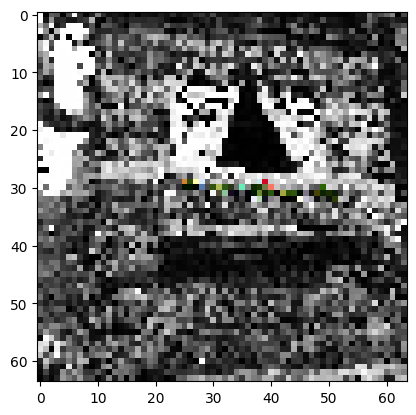

In [97]:
plt.imshow(image_vector[0]/255)

In [98]:
# y=[1] * 1000 + [0] * 1000

In [99]:
y

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [100]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(image_vector, y, test_size=0.20, random_state=0)

In [101]:
X_train.shape

(232, 64, 64, 3)

In [102]:
X_train, X_test = X_train / 255, X_test / 255
# convert to categorical
# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, 2)
y_test = tf.keras.utils.to_categorical(y_test, 2)

In [103]:
y_train[200]

array([0., 1.], dtype=float32)

In [104]:
model=build((IMG_ROWS, IMG_COLS, IMG_CHANNELS), CLASSES)
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 31, 31, 32)        0         
                                                                 
 flatten_3 (Flatten)         (None, 30752)             0         
                                                                 
 dense_6 (Dense)             (None, 32)                984096    
                                                                 
 dense_7 (Dense)             (None, 2)                 66        
                                                      

In [105]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(learning_rate=0.001), metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=128, epochs=50, validation_split=0.1)

Epoch 1/50
2/2 [==============================] - 1s 246ms/step - loss: 2.2765 - accuracy: 0.6346 - val_loss: 3.2415 - val_accuracy: 0.6667
Epoch 2/50
2/2 [==============================] - 0s 121ms/step - loss: 2.7722 - accuracy: 0.6394 - val_loss: 0.6419 - val_accuracy: 0.6667
Epoch 3/50
2/2 [==============================] - 0s 118ms/step - loss: 0.6502 - accuracy: 0.6394 - val_loss: 0.6286 - val_accuracy: 0.6667
Epoch 4/50
2/2 [==============================] - 0s 108ms/step - loss: 0.6140 - accuracy: 0.6538 - val_loss: 0.6061 - val_accuracy: 0.6667
Epoch 5/50
2/2 [==============================] - 0s 121ms/step - loss: 0.5937 - accuracy: 0.6731 - val_loss: 0.6302 - val_accuracy: 0.6667
Epoch 6/50
2/2 [==============================] - 0s 113ms/step - loss: 0.6609 - accuracy: 0.6731 - val_loss: 0.6074 - val_accuracy: 0.6667
Epoch 7/50
2/2 [==============================] - 0s 113ms/step - loss: 0.6394 - accuracy: 0.6779 - val_loss: 0.6043 - val_accuracy: 0.6667
Epoch 8/50
2/2 [====

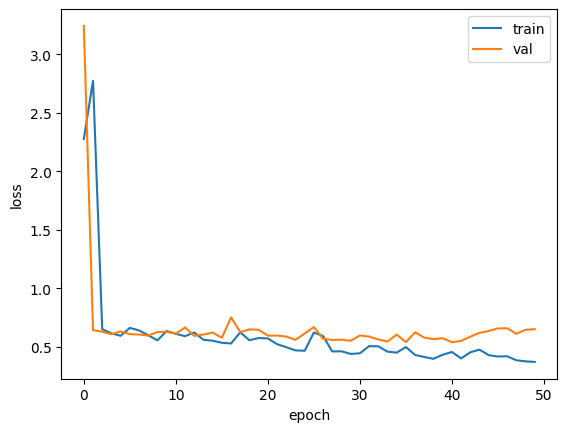

In [106]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

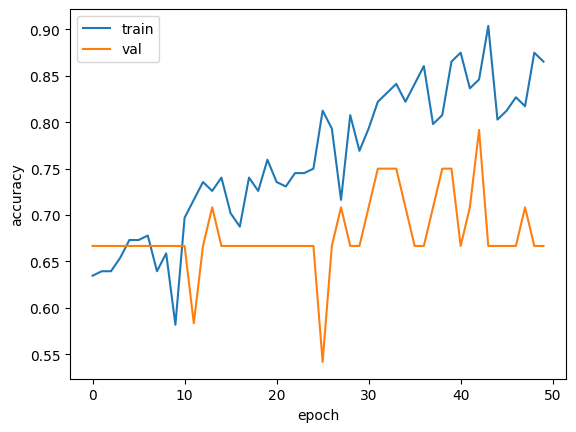

In [107]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','val'])
plt.show()

### 재훈련 전

In [108]:
score = model.evaluate(X_test, y_test)
print("\nTest loss:", score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 7ms/step - loss: 0.6448 - accuracy: 0.7414

Test loss: 0.6447800993919373
Test accuracy: 0.7413793206214905


In [109]:
# 모델 저장

model.save('model_m,s.h5')  # H5 파일 포맷으로 저장

In [110]:
#추가 이미지 학습
# 파일 경로에 대한 glob 패턴을 수정하세요.
mountain_files_added = glob('..\..\data\multi\m_added\*jpg')
seas_files_added = glob('..\..\data\multi\s_added\*jpg')
# 이미지와 라벨을 불러오는 함수 정의
def load_images_and_labels(files, label):
    images = [image.load_img(p, target_size=(IMG_ROWS, IMG_COLS)) for p in files]
    labels = [label] * len(files)
    return images, labels

# 산과 바다 이미지 및 라벨 불러오기
mountain_files_added_images, mountain_files_added_labels = load_images_and_labels(mountain_files_added, 0)  # 산을 0으로 라벨링
seas_files_added_images, seas_files_added_labels = load_images_and_labels(seas_files_added, 1)  

# 이미지와 라벨 병합
images_added = mountain_files_added_images + seas_files_added_images
y_added = mountain_files_added_labels + seas_files_added_labels

In [111]:
# 이미지 벡터화
image_vector_ = np.asarray([image.img_to_array(img) for img in images_added])

In [112]:
from sklearn.model_selection import train_test_split
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(image_vector_, y_added, test_size=0.20, random_state=0)

In [113]:
X_train_2, X_test_2 = X_train_2 / 255, X_test_2 / 255
# convert to categorical
# convert class vectors to binary class matrices
y_train_2 = tf.keras.utils.to_categorical(y_train_2, 2)
y_test_2 = tf.keras.utils.to_categorical(y_test_2, 2)

In [114]:
##############################  모델 불러오기
from tensorflow.keras.models import load_model

# 저장된 모델 파일 로드
model_saved = load_model('model_m,s.h5')

In [117]:
model_saved.fit(X_train_2, y_train_2, batch_size=128, epochs=50, validation_split=0.1)

Epoch 1/50
1/1 [==============================] - 1s 592ms/step - loss: 1.0335 - accuracy: 0.5000 - val_loss: 0.7034 - val_accuracy: 0.5000
Epoch 2/50
1/1 [==============================] - 0s 96ms/step - loss: 0.7010 - accuracy: 0.7143 - val_loss: 0.4623 - val_accuracy: 1.0000
Epoch 3/50
1/1 [==============================] - 0s 138ms/step - loss: 0.5918 - accuracy: 0.8571 - val_loss: 0.4357 - val_accuracy: 1.0000
Epoch 4/50
1/1 [==============================] - 0s 87ms/step - loss: 0.5654 - accuracy: 0.8571 - val_loss: 0.3471 - val_accuracy: 1.0000
Epoch 5/50
1/1 [==============================] - 0s 52ms/step - loss: 0.5385 - accuracy: 0.7857 - val_loss: 0.4122 - val_accuracy: 1.0000
Epoch 6/50
1/1 [==============================] - 0s 62ms/step - loss: 0.5287 - accuracy: 0.9286 - val_loss: 0.2402 - val_accuracy: 1.0000
Epoch 7/50
1/1 [==============================] - 0s 48ms/step - loss: 0.5081 - accuracy: 0.7857 - val_loss: 0.3455 - val_accuracy: 1.0000
Epoch 8/50
1/1 [=========

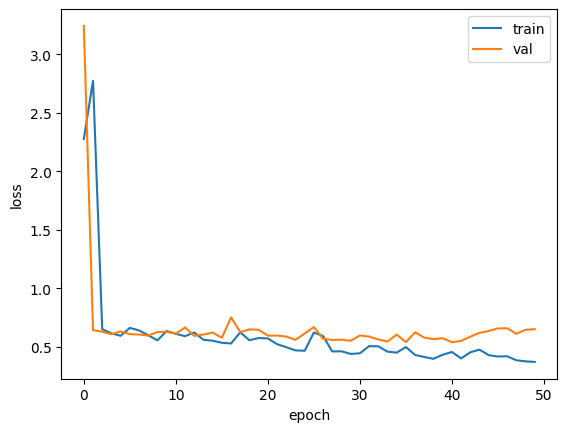

In [118]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

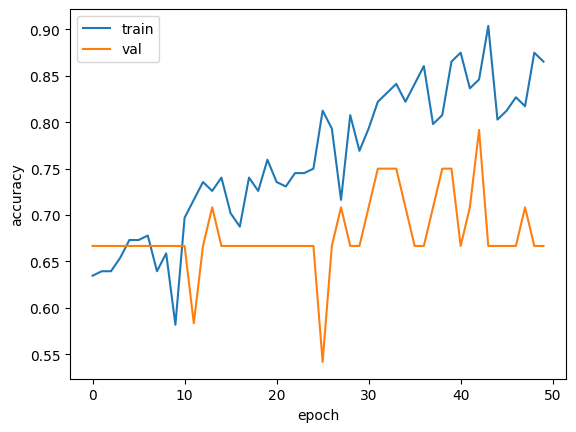

In [119]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','val'])
plt.show()

In [123]:
# 재훈련 전
score1 = model.evaluate(X_test, y_test)
score2 = model.evaluate(X_test_2, y_test_2)
print("\nTest loss:", score1[0])
print('기존의 데이터에 대한 Test accuracy:', score1[1])

print("\nTest loss:", score2[0])
print('새로운 데이터에 대한 Test accuracy:', score2[1])

1/1 [==============================] - 0s 28ms/step - loss: 1.1068 - accuracy: 0.7500

Test loss: 0.6447800993919373
기존의 데이터에 대한 Test accuracy: 0.7413793206214905

Test loss: 1.106763482093811
새로운 데이터에 대한 Test accuracy: 0.75


In [124]:
# 재훈련 후
score1 = model_saved.evaluate(X_test, y_test)
score2 = model_saved.evaluate(X_test_2, y_test_2)
print("\nTest loss:", score1[0])
print('기존의 데이터에 대한 Test accuracy:', score1[1])

print("\nTest loss:", score2[0])
print('새로운 데이터에 대한 Test accuracy:', score2[1])

1/1 [==============================] - 0s 28ms/step - loss: 0.6341 - accuracy: 0.7500

Test loss: 0.7471521496772766
기존의 데이터에 대한 Test accuracy: 0.7241379022598267

Test loss: 0.6340574622154236
새로운 데이터에 대한 Test accuracy: 0.75
